In [4]:
from sklearn import tree
X = [[0,0],[1,1]]
Y =[0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)


In [6]:
clf.predict([[2.,2.]])


array([1])

In [7]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [9]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X,y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

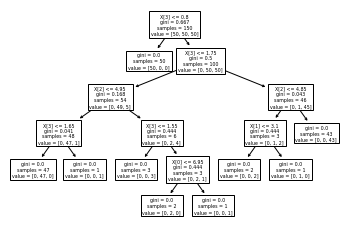

In [10]:
#On trace l'arbre de décision
tree.plot_tree(clf)

In [11]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("Iris")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [12]:
#Importe arbre sous format Texte
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris["feature_names"])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [1]:
#Problèmes de regression
from sklearn import tree
X =[[0,0],[2,2]] 
y = [0.5,2.5]#Il doit y'avoir des valeurs à virgules flottantes au lieu de int
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])


array([0.5])

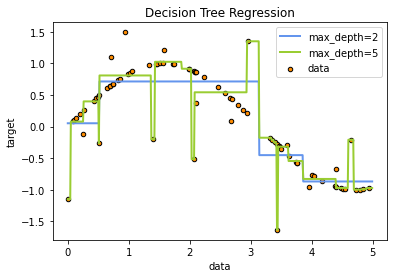

In [8]:
#Regression d'arbre de décision
#Import librairies et modules
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#Créer un random dataset
rng=np.random.RandomState(1)
X = np.sort(5*rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5]+=3 * (0.5 - rng.rand(16))

#Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

#Prediction
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

#plot les resultats
plt.figure()
plt.scatter(X,y,s=20,edgecolor="black",c="darkorange",label="data")
plt.plot(X_test,y_1,color="cornflowerblue",label="max_depth=2",linewidth=2)
plt.plot(X_test,y_2,color="yellowgreen",label="max_depth=5",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

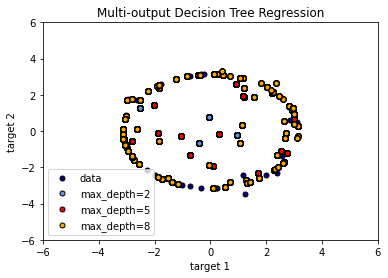

In [11]:
#Problèmes multi-sorties
"""problème d'apprentissage supervisé avec plusieurs sorties à prédire, Y est un tableau 2d de forme (n_samples;n_outputs)"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

#Créer random dataset
rng=np.random.RandomState(1)
X=np.sort(200*rng.rand(100,1)-100, axis=0)
y=np.array([np.pi*np.sin(X).ravel(),np.pi*np.cos(X).ravel()]).T
y[::5,:] +=0.5 -rng.rand(20,2)

#fit regression model
regr_1=DecisionTreeRegressor(max_depth=2)#max_depth permet de controller la taille de l'arbre afin d'éviter le surajustement
regr_2=DecisionTreeRegressor(max_depth=5)
regr_3=DecisionTreeRegressor(max_depth=8)
regr_1.fit(X,y)
regr_2.fit(X,y)
regr_3.fit(X,y)

#Predict
X_test=np.arange(-100.0,100.0,0.01)[:,np.newaxis]
y_1=regr_1.predict(X_test)
y_2=regr_2.predict(X_test)
y_3=regr_3.predict(X_test)

#plot les résultats
plt.figure()
s=25
plt.scatter(y[:,0],y[:,1],c="navy",s=s,edgecolor="black",label="data")
plt.scatter(y_1[:, 0],y_1[:, 1],c="cornflowerblue",s=s,edgecolor="black",label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\joach\scikit_learn_data


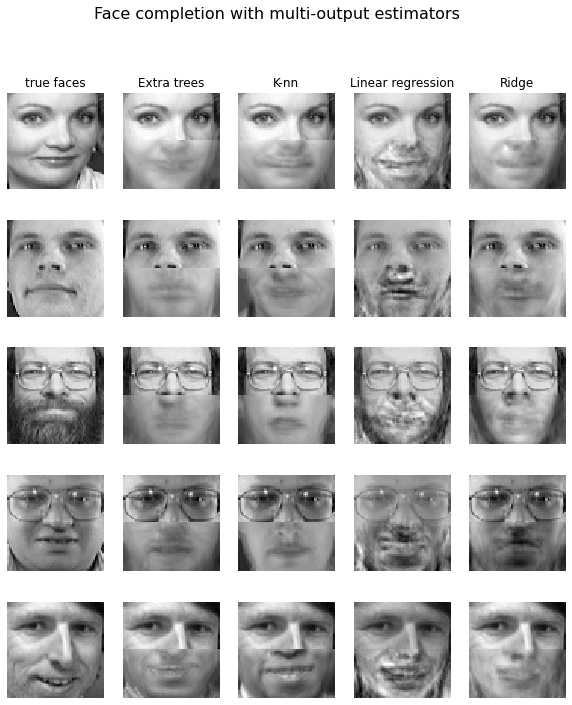

In [12]:
#Complétation faciale avec un estimateur multi-sorties
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {"Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0 ),
              "K-nn": KNeighborsRegressor(),"Linear regression": LinearRegression(),"Ridge": RidgeCV(),}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

In [13]:
#Arbre de décision post_élagage avec élagage de la compléxité des coûts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [14]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

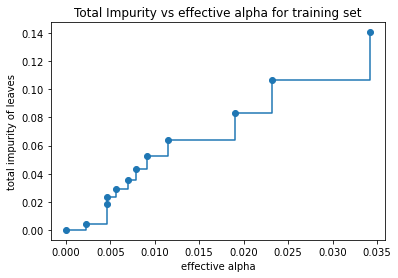

In [15]:
"""Dans le graphique suivant, la valeur alpha efficace maximale est supprimée, 
car il s'agit de l'arbre trivial avec un seul nœud."""
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [16]:
"""Ensuite, nous formons un arbre de décision en utilisant les alphas effectifs. 
La dernière valeur dans ccp_alphasest la valeur alpha qui élague l'arbre entier, laissant l'arbre, clfs[-1], avec un nœud."""
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


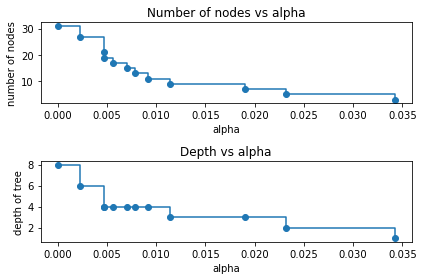

In [17]:
"""Pour le reste de cet exemple, nous supprimons le dernier élément dans clfset ccp_alphas, car il s'agit de l'arbre 
trivial avec un seul nœud. 
Ici, nous montrons que le nombre de nœuds et la profondeur de l'arbre diminuent à mesure que alpha augmente."""
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

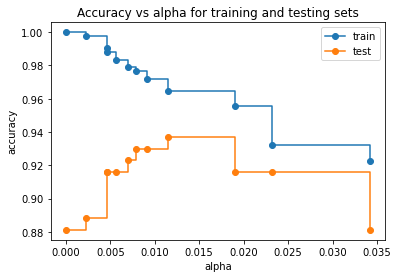

In [18]:
"""Lorsque ccp_alphaest défini sur zéro et en conservant les autres paramètres par défaut de DecisionTreeClassifier, 
l'arbre se surajuste, ce qui conduit à une précision d'apprentissage de 100 % et une précision de test de 88 %. 
Au fur et à mesure que alpha augmente, une plus grande partie de l'arbre est élaguée, 
créant ainsi un arbre de décision qui généralise mieux. Dans cet exemple, 
le réglage ccp_alpha=0.015maximise la précision du test."""

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()